<a href="https://colab.research.google.com/github/mechandumuttur/Using-Random-Forest-and-SVM-finding-accuracy-for-the-dataset/blob/main/RF_%26_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install pandas,numpy**

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **import pandas and numpy**

In [ ]:
import pandas as pd
import numpy as np

# **Load Dataset**

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/rf & svm/DDoSdata (2).csv')

<ipython-input-6-7314653f775e>:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/rf & svm/DDoSdata (2).csv')


# **retrieving the dataset**

In [ ]:
data

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,3577359,3577357,1.526352e+09,e,1,udp,3,192.168.100.3,36242,205.251.194.102,...,6.83201,2,74,6.81487,9.49326,4,122,0,Normal,Normal
1927097,3577360,3577358,1.526352e+09,e,1,udp,3,192.168.100.3,63574,205.251.194.102,...,6.83201,2,74,6.84924,9.49326,4,122,0,Normal,Normal
1927098,3577361,3577359,1.526352e+09,e,1,udp,3,192.168.100.3,59485,205.251.194.154,...,7.19694,1,74,7.19694,9.49326,2,122,0,Normal,Normal
1927099,3577362,3577360,1.526352e+09,e,1,udp,3,192.168.100.3,20844,192.31.80.30,...,7.12689,2,74,7.12398,9.49326,4,122,0,Normal,Normal


**And if we want a more statistical analysis of our data we can use the .describe() method**

In [ ]:
data.describe()

,Unnamed: 0,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,...,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06
mean,2.613812e+06,2.613811e+06,1.528097e+09,1.442916e+00,1.984566e+00,7.913937e+00,1.126113e+03,3.043337e+00,1.528097e+09,1.232456e+05,...,7.340666e+02,1.337962e+00,1.806924e+00,9.988476e+01,8.194398e+01,8.421088e-01,1.418524e+00,6.771640e+02,5.741962e+02,9.997525e-01
std,5.563069e+05,5.563063e+05,2.756896e+04,6.024243e-01,9.998889e-01,1.591975e+02,1.548951e+05,1.191149e+00,2.756568e+04,7.380114e+04,...,8.333697e+02,8.717285e+01,2.242319e+02,2.628704e+00,2.422842e+01,6.318281e+01,6.320693e+01,5.036687e+02,4.717024e+02,1.573089e-02
min,1.650261e+06,1.650261e+06,1.526344e+09,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,1.000000e+00,1.526344e+09,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.132037e+06,2.132036e+06,1.528096e+09,1.000000e+00,1.000000e+00,5.000000e+00,4.200000e+02,3.000000e+00,1.528096e+09,6.004700e+04,...,5.000000e+02,3.594890e-01,3.703380e-01,1.000000e+02,6.800000e+01,3.502690e-01,3.703120e-01,3.650000e+02,2.680000e+02,1.000000e+00
50%,2.613812e+06,2.613811e+06,1.528096e+09,1.000000e+00,1.000000e+00,7.000000e+00,6.160000e+02,3.000000e+00,1.528096e+09,1.202690e+05,...,6.820000e+02,5.410290e-01,5.497720e-01,1.000000e+02,9.700000e+01,5.437660e-01,5.496870e-01,6.270000e+02,5.000000e+02,1.000000e+00
75%,3.095588e+06,3.095586e+06,1.528099e+09,2.000000e+00,3.000000e+00,1.000000e+01,7.800000e+02,4.000000e+00,1.528099e+09,1.831610e+05,...,9.520000e+02,7.588950e-01,7.534680e-01,1.000000e+02,1.000000e+02,7.286400e-01,7.534480e-01,9.480000e+02,7.840000e+02,1.000000e+00
max,3.577363e+06,3.577361e+06,1.528103e+09,7.000000e+00,5.000000e+00,7.005700e+04,7.183334e+07,8.000000e+00,1.528103e+09,2.621680e+05,...,2.444250e+05,8.695650e+04,1.818180e+05,1.000000e+02,1.000000e+02,8.695650e+04,8.695650e+04,1.125440e+05,1.179390e+05,1.000000e+00


To see number of colums available in the dataset

In [ ]:
data.columns

Index(['Unnamed: 0', 'pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory'],
      dtype='object')

to get the current shape of an array we use shape method


In [ ]:
data.shape

(1927101, 47)

# **Checking values count of category**

In [ ]:
data['category'].value_counts()

DDoS      1926624
Normal        477
Name: category, dtype: int64

To check for category

In [ ]:
Data = data['category'] == 'Normal'

In [ ]:
Data

0          False
1          False
2          False
3          False
4          False
           ...  
1927096     True
1927097     True
1927098     True
1927099     True
1927100     True
Name: category, Length: 1927101, dtype: bool

To get any other category of data present in the dataset

In [ ]:
NormalData = data[data['category'] == 'Normal']

In [ ]:
NormalData

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,e,1,arp,2,192.168.100.1,-1,192.168.100.3,...,0.003344,85,2,0.005688,0.005688,4,6,0,Normal,Normal
1926625,3576888,3576886,1.526344e+09,e,1,tcp,1,192.168.100.7,139,192.168.100.4,...,0.006878,1,2,0.006878,0.006878,10,10,0,Normal,Normal
1926626,3576889,3576887,1.526344e+09,e,1,udp,3,192.168.100.149,51838,27.124.125.250,...,41.181900,1,26,41.181900,41.181900,2,4,0,Normal,Normal
1926627,3576890,3576888,1.526344e+09,e,1,arp,2,192.168.100.4,-1,192.168.100.7,...,0.006877,1,1,0.005688,0.005688,10,10,0,Normal,Normal
1926628,3576891,3576889,1.526344e+09,e,1,udp,3,192.168.100.27,58999,192.168.100.1,...,0.007018,4,2,0.007018,0.027588,4,4,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,3577359,3577357,1.526352e+09,e,1,udp,3,192.168.100.3,36242,205.251.194.102,...,6.832010,2,74,6.814870,9.493260,4,122,0,Normal,Normal
1927097,3577360,3577358,1.526352e+09,e,1,udp,3,192.168.100.3,63574,205.251.194.102,...,6.832010,2,74,6.849240,9.493260,4,122,0,Normal,Normal
1927098,3577361,3577359,1.526352e+09,e,1,udp,3,192.168.100.3,59485,205.251.194.154,...,7.196940,1,74,7.196940,9.493260,2,122,0,Normal,Normal
1927099,3577362,3577360,1.526352e+09,e,1,udp,3,192.168.100.3,20844,192.31.80.30,...,7.126890,2,74,7.123980,9.493260,4,122,0,Normal,Normal


To get only DDOS data from the category

In [ ]:
DDosData = data[data['category'] == 'DDoS']

In [ ]:
DDosData

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.216620,40,38,1.560930,1.216620,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.216620,40,38,1.561070,1.216620,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.216620,40,38,1.249800,1.216620,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.216620,40,38,1.249860,1.216620,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.216620,40,38,1.249910,1.216620,328,308,1,DDoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926619,3576882,3576880,1.528099e+09,e,1,udp,3,192.168.100.149,13250,192.168.100.3,...,0.705788,85,26,0.538012,0.705788,821,178,1,DDoS,UDP
1926620,3576883,3576881,1.528099e+09,e,1,udp,3,192.168.100.149,13251,192.168.100.3,...,0.705788,85,26,0.538012,0.705788,821,178,1,DDoS,UDP
1926621,3576884,3576882,1.528099e+09,e,1,udp,3,192.168.100.149,13252,192.168.100.3,...,0.705788,85,26,0.538012,0.705788,821,178,1,DDoS,UDP
1926622,3576885,3576883,1.528099e+09,e,1,udp,3,192.168.100.149,13253,192.168.100.3,...,0.705788,85,26,0.538012,0.705788,821,178,1,DDoS,UDP


we take only 600 rows

In [ ]:
DDosData = DDosData.sample(n = 600)

In [ ]:
DDosData

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
105185,1755446,1755446,1.528096e+09,e s,2,tcp,1,192.168.100.149,23992,192.168.100.3,...,0.240329,100,94,0.190271,0.240329,154,136,1,DDoS,TCP
196913,1847174,1847174,1.528096e+09,e,1,tcp,1,192.168.100.149,48410,192.168.100.3,...,91.741400,100,95,0.000000,91.741400,95,95,1,DDoS,TCP
452550,2102812,2102811,1.528096e+09,e s,2,tcp,1,192.168.100.149,3223,192.168.100.3,...,0.287847,100,33,0.497298,0.287847,174,174,1,DDoS,TCP
863794,2514056,2514055,1.528096e+09,e s,2,tcp,1,192.168.100.148,63044,192.168.100.3,...,0.078272,100,89,0.073804,0.078272,300,267,1,DDoS,TCP
1358420,3008683,3008681,1.528099e+09,e,1,udp,3,192.168.100.148,5681,192.168.100.3,...,0.787468,100,100,0.729308,0.787468,1027,1027,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,e s,2,tcp,1,192.168.100.149,34003,192.168.100.3,...,0.517677,100,44,0.555303,0.517677,794,364,1,DDoS,TCP
1756804,3407067,3407065,1.528099e+09,e,1,udp,3,192.168.100.149,27282,192.168.100.3,...,0.565535,100,97,0.565315,0.565535,700,679,1,DDoS,UDP
44615,1694876,1694876,1.528096e+09,e s,2,tcp,1,192.168.100.147,20146,192.168.100.3,...,0.276477,100,100,0.207302,0.276477,130,130,1,DDoS,TCP
1763396,3413659,3413657,1.528099e+09,e,1,udp,3,192.168.100.150,36432,192.168.100.3,...,0.549949,100,75,0.572041,0.549949,675,525,1,DDoS,UDP


Concat normaldata and ddosdata to get only category of DDoSdata

In [ ]:
final_Data = pd.concat([NormalData,DDosData])

In [ ]:
final_Data

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,e,1,arp,2,192.168.100.1,-1,192.168.100.3,...,0.003344,85,2,0.005688,0.005688,4,6,0,Normal,Normal
1926625,3576888,3576886,1.526344e+09,e,1,tcp,1,192.168.100.7,139,192.168.100.4,...,0.006878,1,2,0.006878,0.006878,10,10,0,Normal,Normal
1926626,3576889,3576887,1.526344e+09,e,1,udp,3,192.168.100.149,51838,27.124.125.250,...,41.181900,1,26,41.181900,41.181900,2,4,0,Normal,Normal
1926627,3576890,3576888,1.526344e+09,e,1,arp,2,192.168.100.4,-1,192.168.100.7,...,0.006877,1,1,0.005688,0.005688,10,10,0,Normal,Normal
1926628,3576891,3576889,1.526344e+09,e,1,udp,3,192.168.100.27,58999,192.168.100.1,...,0.007018,4,2,0.007018,0.027588,4,4,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,e s,2,tcp,1,192.168.100.149,34003,192.168.100.3,...,0.517677,100,44,0.555303,0.517677,794,364,1,DDoS,TCP
1756804,3407067,3407065,1.528099e+09,e,1,udp,3,192.168.100.149,27282,192.168.100.3,...,0.565535,100,97,0.565315,0.565535,700,679,1,DDoS,UDP
44615,1694876,1694876,1.528096e+09,e s,2,tcp,1,192.168.100.147,20146,192.168.100.3,...,0.276477,100,100,0.207302,0.276477,130,130,1,DDoS,TCP
1763396,3413659,3413657,1.528099e+09,e,1,udp,3,192.168.100.150,36432,192.168.100.3,...,0.549949,100,75,0.572041,0.549949,675,525,1,DDoS,UDP


Counting category after concatination

In [ ]:
final_Data['category'].value_counts()

DDoS      600
Normal    477
Name: category, dtype: int64

To see number of colums available in the dataset

In [ ]:
final_Data.columns

Index(['Unnamed: 0', 'pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory'],
      dtype='object')

To find the correlation among the columns in the Dataframe

In [ ]:
final_Data.corr()

<ipython-input-24-c6e2d09a1a5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_Data.corr()


,Unnamed: 0,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
Unnamed: 0,1.000000,1.000000,-0.753857,-0.498539,0.759293,0.133153,0.119250,0.293917,-0.753856,-0.504832,...,0.133787,0.092997,0.065180,-0.748892,-0.585470,0.086405,0.071136,0.136479,0.129986,-0.754751
pkSeqID,1.000000,1.000000,-0.753857,-0.498539,0.759293,0.133153,0.119250,0.293917,-0.753856,-0.504833,...,0.133787,0.092997,0.065180,-0.748892,-0.585470,0.086405,0.071136,0.136479,0.129986,-0.754751
stime,-0.753857,-0.753857,1.000000,0.299567,-0.417133,-0.176349,-0.158169,0.050353,1.000000,0.706440,...,-0.172116,-0.123617,-0.086538,0.992631,0.804703,-0.114798,-0.109623,-0.165858,-0.157170,0.999997
flgs_number,-0.498539,-0.498539,0.299567,1.000000,-0.592129,0.309601,0.332857,-0.300994,0.299634,0.134652,...,0.146698,-0.048712,-0.034296,0.293031,0.202574,-0.041934,-0.029326,0.252182,0.254122,0.300371
proto_number,0.759293,0.759293,-0.417133,-0.592129,1.000000,-0.056908,-0.056311,0.487769,-0.417232,-0.288530,...,-0.058323,-0.030102,-0.020831,-0.407330,-0.285931,0.072573,0.050701,-0.114433,-0.073283,-0.418457
pkts,0.133153,0.133153,-0.176349,0.309601,-0.056908,1.000000,0.983826,-0.066980,-0.176092,-0.142031,...,0.833721,-0.015998,-0.011799,-0.187302,-0.203741,-0.004543,0.059252,0.831206,0.826836,-0.176178
bytes,0.119250,0.119250,-0.158169,0.332857,-0.056311,0.983826,1.000000,-0.072832,-0.157939,-0.127293,...,0.802092,-0.014163,-0.010510,-0.168377,-0.181918,-0.003179,0.057837,0.795838,0.810375,-0.158012
state_number,0.293917,0.293917,0.050353,-0.300994,0.487769,-0.066980,-0.072832,1.000000,0.050318,0.094303,...,-0.040279,-0.081338,-0.058206,0.067446,-0.015269,-0.068565,-0.023623,-0.082083,-0.061704,0.049694
ltime,-0.753856,-0.753856,1.000000,0.299634,-0.417232,-0.176092,-0.157939,0.050318,1.000000,0.706428,...,-0.171861,-0.123644,-0.086557,0.992625,0.804664,-0.114820,-0.109625,-0.165602,-0.156921,0.999997
seq,-0.504832,-0.504833,0.706440,0.134652,-0.288530,-0.142031,-0.127293,0.094303,0.706428,1.000000,...,-0.140772,-0.087569,-0.059216,0.705622,0.557081,-0.072316,-0.064176,-0.136195,-0.131143,0.706433


In [ ]:
final_Data

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,e,1,arp,2,192.168.100.1,-1,192.168.100.3,...,0.003344,85,2,0.005688,0.005688,4,6,0,Normal,Normal
1926625,3576888,3576886,1.526344e+09,e,1,tcp,1,192.168.100.7,139,192.168.100.4,...,0.006878,1,2,0.006878,0.006878,10,10,0,Normal,Normal
1926626,3576889,3576887,1.526344e+09,e,1,udp,3,192.168.100.149,51838,27.124.125.250,...,41.181900,1,26,41.181900,41.181900,2,4,0,Normal,Normal
1926627,3576890,3576888,1.526344e+09,e,1,arp,2,192.168.100.4,-1,192.168.100.7,...,0.006877,1,1,0.005688,0.005688,10,10,0,Normal,Normal
1926628,3576891,3576889,1.526344e+09,e,1,udp,3,192.168.100.27,58999,192.168.100.1,...,0.007018,4,2,0.007018,0.027588,4,4,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,e s,2,tcp,1,192.168.100.149,34003,192.168.100.3,...,0.517677,100,44,0.555303,0.517677,794,364,1,DDoS,TCP
1756804,3407067,3407065,1.528099e+09,e,1,udp,3,192.168.100.149,27282,192.168.100.3,...,0.565535,100,97,0.565315,0.565535,700,679,1,DDoS,UDP
44615,1694876,1694876,1.528096e+09,e s,2,tcp,1,192.168.100.147,20146,192.168.100.3,...,0.276477,100,100,0.207302,0.276477,130,130,1,DDoS,TCP
1763396,3413659,3413657,1.528099e+09,e,1,udp,3,192.168.100.150,36432,192.168.100.3,...,0.549949,100,75,0.572041,0.549949,675,525,1,DDoS,UDP


Plotting the figure for final data,Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix.

<ipython-input-26-82b0d5cc693c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = final_Data.corr()


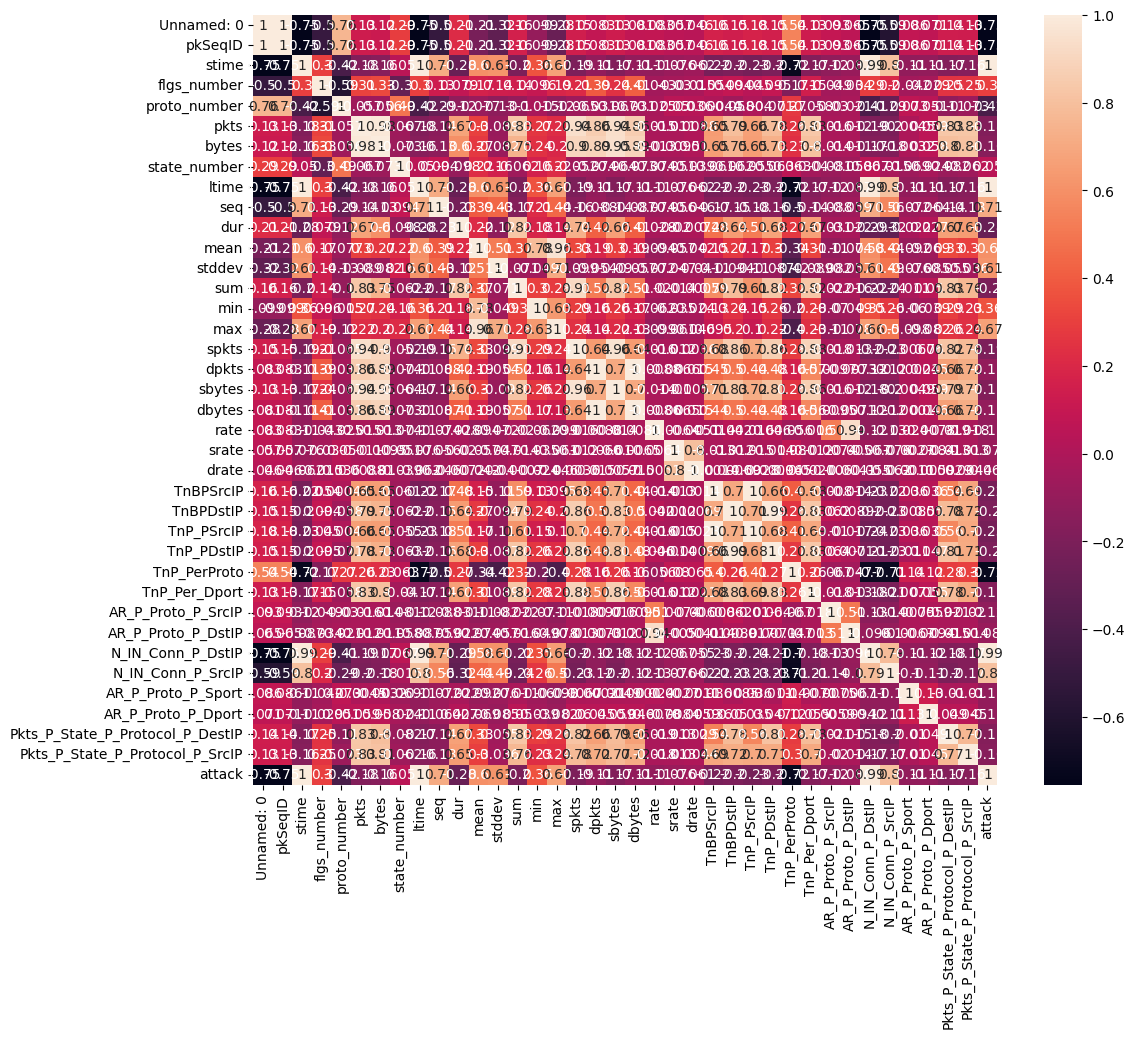

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = final_Data.corr()
sns.heatmap(cor, annot=True)
plt.show()

droping some columns

In [ ]:
final_Data = final_Data.drop(['drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP'], axis =1)

In [ ]:
final_Data

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,e,1,arp,2,192.168.100.1,-1,192.168.100.3,...,0.000007,2,2,120,120,0.002508,0.000836,0,Normal,Normal
1926625,3576888,3576886,1.526344e+09,e,1,tcp,1,192.168.100.7,139,192.168.100.4,...,0.000042,5,5,350,330,0.006190,0.002751,0,Normal,Normal
1926626,3576889,3576887,1.526344e+09,e,1,udp,3,192.168.100.149,51838,27.124.125.250,...,0.048565,1,1,90,90,20.590960,0.000000,0,Normal,Normal
1926627,3576890,3576888,1.526344e+09,e,1,arp,2,192.168.100.4,-1,192.168.100.7,...,0.000261,5,5,210,300,0.006189,0.002751,0,Normal,Normal
1926628,3576891,3576889,1.526344e+09,e,1,udp,3,192.168.100.27,58999,192.168.100.1,...,0.178655,2,2,174,456,0.005264,0.001755,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,e s,2,tcp,1,192.168.100.149,34003,192.168.100.3,...,4.199140,7,2,890,120,0.493603,0.370202,1,DDoS,TCP
1756804,3407067,3407065,1.528099e+09,e,1,udp,3,192.168.100.149,27282,192.168.100.3,...,4.163939,7,0,420,0,0.484556,0.484556,1,DDoS,UDP
44615,1694876,1694876,1.528096e+09,e s,2,tcp,1,192.168.100.147,20146,192.168.100.3,...,0.000000,2,0,308,0,0.103651,0.103651,1,DDoS,TCP
1763396,3413659,3413657,1.528099e+09,e,1,udp,3,192.168.100.150,36432,192.168.100.3,...,4.090592,7,0,420,0,0.490321,0.490321,1,DDoS,UDP


In [ ]:
final_Data.columns

Index(['Unnamed: 0', 'pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'attack', 'category', 'subcategory'],
      dtype='object')

<h2>Filter Features by Correlation</h2>
<br>features

Plotting each value along with the name of the feature in ascending order means from big to small the values which comes first are the values which are highly dependent on target variable.

<ipython-input-30-10a2ea8decba>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = final_Data.corr()


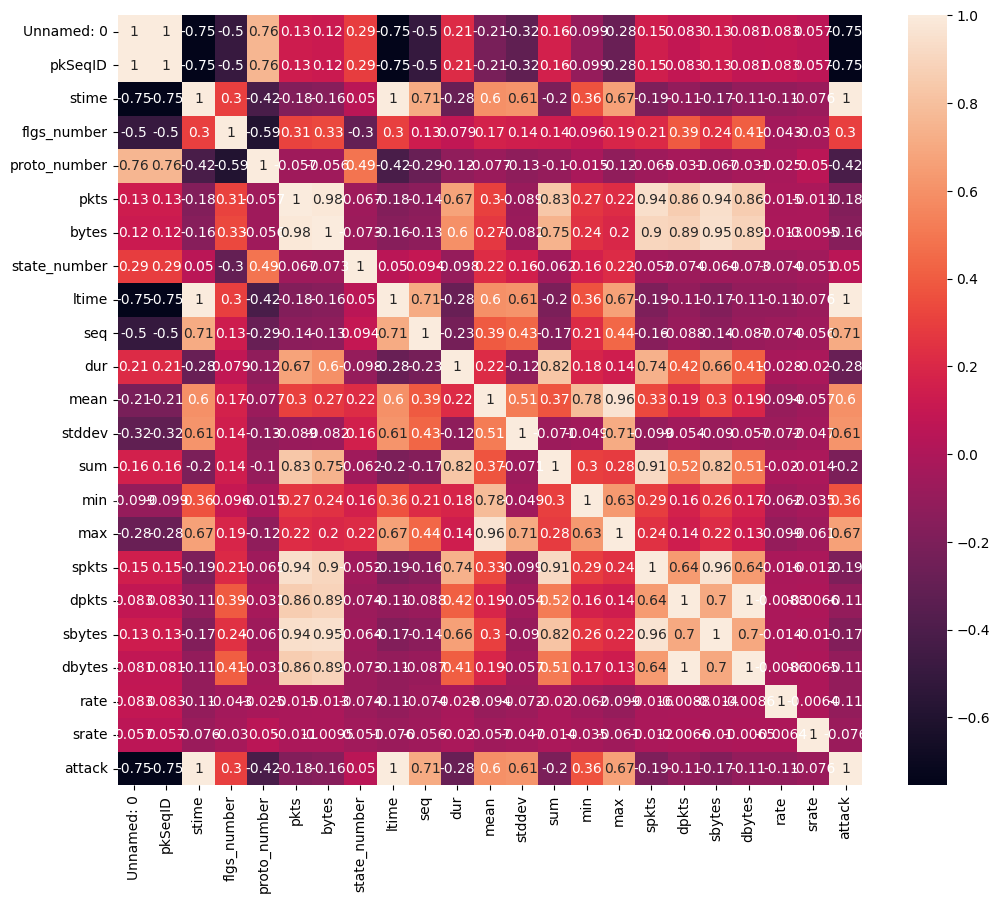

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = final_Data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
final_Data

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,e,1,arp,2,192.168.100.1,-1,192.168.100.3,...,0.000007,2,2,120,120,0.002508,0.000836,0,Normal,Normal
1926625,3576888,3576886,1.526344e+09,e,1,tcp,1,192.168.100.7,139,192.168.100.4,...,0.000042,5,5,350,330,0.006190,0.002751,0,Normal,Normal
1926626,3576889,3576887,1.526344e+09,e,1,udp,3,192.168.100.149,51838,27.124.125.250,...,0.048565,1,1,90,90,20.590960,0.000000,0,Normal,Normal
1926627,3576890,3576888,1.526344e+09,e,1,arp,2,192.168.100.4,-1,192.168.100.7,...,0.000261,5,5,210,300,0.006189,0.002751,0,Normal,Normal
1926628,3576891,3576889,1.526344e+09,e,1,udp,3,192.168.100.27,58999,192.168.100.1,...,0.178655,2,2,174,456,0.005264,0.001755,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,e s,2,tcp,1,192.168.100.149,34003,192.168.100.3,...,4.199140,7,2,890,120,0.493603,0.370202,1,DDoS,TCP
1756804,3407067,3407065,1.528099e+09,e,1,udp,3,192.168.100.149,27282,192.168.100.3,...,4.163939,7,0,420,0,0.484556,0.484556,1,DDoS,UDP
44615,1694876,1694876,1.528096e+09,e s,2,tcp,1,192.168.100.147,20146,192.168.100.3,...,0.000000,2,0,308,0,0.103651,0.103651,1,DDoS,TCP
1763396,3413659,3413657,1.528099e+09,e,1,udp,3,192.168.100.150,36432,192.168.100.3,...,4.090592,7,0,420,0,0.490321,0.490321,1,DDoS,UDP


In [ ]:
fd = final_Data

In [ ]:
final_Data is fd

True

In [ ]:
def correlation(dataset, threshold):#X_train,0.5
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)): #traverse through the rows
        for j in range(i): #traverse through column
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Columns number available in dataset

In [ ]:
corr_features = correlation(fd, 0.5)#data,threshold
len(set(corr_features))

<ipython-input-34-2dfd7430a538>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


17

columns names

In [ ]:
corr_features

{'attack',
 'bytes',
 'dbytes',
 'dpkts',
 'dur',
 'ltime',
 'max',
 'mean',
 'min',
 'pkSeqID',
 'proto_number',
 'sbytes',
 'seq',
 'spkts',
 'stddev',
 'stime',
 'sum'}

In [ ]:
fd.columns

Index(['Unnamed: 0', 'pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'attack', 'category', 'subcategory'],
      dtype='object')

Information about the colums available in the dataset

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1926624 to 1044018
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1077 non-null   int64  
 1   pkSeqID       1077 non-null   int64  
 2   stime         1077 non-null   float64
 3   flgs          1077 non-null   object 
 4   flgs_number   1077 non-null   int64  
 5   proto         1077 non-null   object 
 6   proto_number  1077 non-null   int64  
 7   saddr         1077 non-null   object 
 8   sport         1077 non-null   object 
 9   daddr         1077 non-null   object 
 10  dport         1077 non-null   object 
 11  pkts          1077 non-null   int64  
 12  bytes         1077 non-null   int64  
 13  state         1077 non-null   object 
 14  state_number  1077 non-null   int64  
 15  ltime         1077 non-null   float64
 16  seq           1077 non-null   int64  
 17  dur           1077 non-null   float64
 18  mean          1077 

prints other than number available in the column flgs

In [ ]:
fd.flgs.unique()

array(['e', 'e &', 'e d', 'e s', 'e g'], dtype=object)

In [ ]:
from sklearn import preprocessing

to convert letters into numbers we use labelencoder

In [ ]:
le = preprocessing.LabelEncoder()

fit() method takes the training data as arguments, which can be array

In [ ]:
le.fit(fd['flgs'])

LabelEncoder()

In [ ]:
le

LabelEncoder()

In [ ]:
le.classes_

array(['e', 'e &', 'e d', 'e g', 'e s'], dtype=object)

converting string/object to int

In [ ]:
fd['flgs'] = le.transform(fd['flgs'])

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1926624 to 1044018
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1077 non-null   int64  
 1   pkSeqID       1077 non-null   int64  
 2   stime         1077 non-null   float64
 3   flgs          1077 non-null   int64  
 4   flgs_number   1077 non-null   int64  
 5   proto         1077 non-null   object 
 6   proto_number  1077 non-null   int64  
 7   saddr         1077 non-null   object 
 8   sport         1077 non-null   object 
 9   daddr         1077 non-null   object 
 10  dport         1077 non-null   object 
 11  pkts          1077 non-null   int64  
 12  bytes         1077 non-null   int64  
 13  state         1077 non-null   object 
 14  state_number  1077 non-null   int64  
 15  ltime         1077 non-null   float64
 16  seq           1077 non-null   int64  
 17  dur           1077 non-null   float64
 18  mean          1077 

In [ ]:
fd.proto

1926624    arp
1926625    tcp
1926626    udp
1926627    arp
1926628    udp
          ... 
267329     tcp
1756804    udp
44615      tcp
1763396    udp
1044018    udp
Name: proto, Length: 1077, dtype: object

In [ ]:
le.fit(fd['proto'])

LabelEncoder()

In [ ]:
fd['proto'] = le.transform(fd['proto'])

In [ ]:
le.fit(fd['saddr'])
fd['saddr'] = le.transform(fd['saddr'])

In [ ]:
fd['sport'] = pd.to_numeric(fd['sport'])

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1926624 to 1044018
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1077 non-null   int64  
 1   pkSeqID       1077 non-null   int64  
 2   stime         1077 non-null   float64
 3   flgs          1077 non-null   int64  
 4   flgs_number   1077 non-null   int64  
 5   proto         1077 non-null   int64  
 6   proto_number  1077 non-null   int64  
 7   saddr         1077 non-null   int64  
 8   sport         1077 non-null   int64  
 9   daddr         1077 non-null   object 
 10  dport         1077 non-null   object 
 11  pkts          1077 non-null   int64  
 12  bytes         1077 non-null   int64  
 13  state         1077 non-null   object 
 14  state_number  1077 non-null   int64  
 15  ltime         1077 non-null   float64
 16  seq           1077 non-null   int64  
 17  dur           1077 non-null   float64
 18  mean          1077 

In [ ]:
fd.daddr

1926624     192.168.100.3
1926625     192.168.100.4
1926626    27.124.125.250
1926627     192.168.100.7
1926628     192.168.100.1
                ...      
267329      192.168.100.3
1756804     192.168.100.3
44615       192.168.100.3
1763396     192.168.100.3
1044018     192.168.100.3
Name: daddr, Length: 1077, dtype: object

In [ ]:
le.fit(fd['daddr'])


LabelEncoder()

In [ ]:
le.classes_

array(['128.63.2.53', '129.250.35.250', '13.55.154.73', '156.154.100.3',
       '156.154.101.3', '172.217.25.170', '184.85.248.65', '192.112.36.4',
       '192.12.94.30', '192.168.100.1', '192.168.100.147',
       '192.168.100.148', '192.168.100.149', '192.168.100.150',
       '192.168.100.255', '192.168.100.27', '192.168.100.3',
       '192.168.100.4', '192.168.100.5', '192.168.100.55',
       '192.168.100.7', '192.168.217.2', '192.203.230.10', '192.26.92.30',
       '192.31.80.30', '192.33.14.30', '192.33.4.12', '192.35.51.30',
       '192.36.148.17', '192.41.162.30', '192.42.93.30', '192.48.79.30',
       '192.5.5.241', '192.52.178.30', '192.54.112.30', '192.55.83.30',
       '192.58.128.30', '198.41.0.4', '199.19.56.1', '199.19.57.1',
       '199.7.83.42', '199.7.91.13', '202.12.27.33', '205.251.192.170',
       '205.251.193.2', '205.251.193.205', '205.251.194.102',
       '205.251.194.154', '205.251.194.167', '205.251.194.201',
       '205.251.194.84', '205.251.194.86', '205.251.1

In [ ]:
fd['daddr'] = le.transform(fd['daddr'])

In [ ]:
fd.dport

1926624       -1
1926625    36390
1926626      123
1926627       -1
1926628       53
           ...  
267329        80
1756804       80
44615         80
1763396       80
1044018       80
Name: dport, Length: 1077, dtype: object

In [ ]:
fd['dport'] = pd.to_numeric(fd['dport'])

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1926624 to 1044018
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1077 non-null   int64  
 1   pkSeqID       1077 non-null   int64  
 2   stime         1077 non-null   float64
 3   flgs          1077 non-null   int64  
 4   flgs_number   1077 non-null   int64  
 5   proto         1077 non-null   int64  
 6   proto_number  1077 non-null   int64  
 7   saddr         1077 non-null   int64  
 8   sport         1077 non-null   int64  
 9   daddr         1077 non-null   int64  
 10  dport         1077 non-null   int64  
 11  pkts          1077 non-null   int64  
 12  bytes         1077 non-null   int64  
 13  state         1077 non-null   object 
 14  state_number  1077 non-null   int64  
 15  ltime         1077 non-null   float64
 16  seq           1077 non-null   int64  
 17  dur           1077 non-null   float64
 18  mean          1077 

In [ ]:
fd.state

1926624    CON
1926625    CON
1926626    CON
1926627    CON
1926628    CON
          ... 
267329     RST
1756804    INT
44615      REQ
1763396    INT
1044018    INT
Name: state, Length: 1077, dtype: object

In [ ]:
le.fit(fd['state'])
fd['state'] = le.transform(fd['state'])

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1926624 to 1044018
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1077 non-null   int64  
 1   pkSeqID       1077 non-null   int64  
 2   stime         1077 non-null   float64
 3   flgs          1077 non-null   int64  
 4   flgs_number   1077 non-null   int64  
 5   proto         1077 non-null   int64  
 6   proto_number  1077 non-null   int64  
 7   saddr         1077 non-null   int64  
 8   sport         1077 non-null   int64  
 9   daddr         1077 non-null   int64  
 10  dport         1077 non-null   int64  
 11  pkts          1077 non-null   int64  
 12  bytes         1077 non-null   int64  
 13  state         1077 non-null   int64  
 14  state_number  1077 non-null   int64  
 15  ltime         1077 non-null   float64
 16  seq           1077 non-null   int64  
 17  dur           1077 non-null   float64
 18  mean          1077 

In [ ]:
le.fit(fd['category'])
fd['category'] = le.transform(fd['category'])

In [ ]:
le.fit(fd['subcategory'])
fd['subcategory'] = le.transform(fd['subcategory'])

In [ ]:
fd

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,0,1,0,2,0,-1,16,...,0.000007,2,2,120,120,0.002508,0.000836,0,1,0
1926625,3576888,3576886,1.526344e+09,0,1,2,1,12,139,17,...,0.000042,5,5,350,330,0.006190,0.002751,0,1,0
1926626,3576889,3576887,1.526344e+09,0,1,3,3,3,51838,71,...,0.048565,1,1,90,90,20.590960,0.000000,0,1,0
1926627,3576890,3576888,1.526344e+09,0,1,0,2,7,-1,20,...,0.000261,5,5,210,300,0.006189,0.002751,0,1,0
1926628,3576891,3576889,1.526344e+09,0,1,3,3,5,58999,9,...,0.178655,2,2,174,456,0.005264,0.001755,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,4,2,2,1,3,34003,16,...,4.199140,7,2,890,120,0.493603,0.370202,1,0,1
1756804,3407067,3407065,1.528099e+09,0,1,3,3,3,27282,16,...,4.163939,7,0,420,0,0.484556,0.484556,1,0,2
44615,1694876,1694876,1.528096e+09,4,2,2,1,1,20146,16,...,0.000000,2,0,308,0,0.103651,0.103651,1,0,1
1763396,3413659,3413657,1.528099e+09,0,1,3,3,4,36432,16,...,4.090592,7,0,420,0,0.490321,0.490321,1,0,2


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1926624 to 1044018
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1077 non-null   int64  
 1   pkSeqID       1077 non-null   int64  
 2   stime         1077 non-null   float64
 3   flgs          1077 non-null   int64  
 4   flgs_number   1077 non-null   int64  
 5   proto         1077 non-null   int64  
 6   proto_number  1077 non-null   int64  
 7   saddr         1077 non-null   int64  
 8   sport         1077 non-null   int64  
 9   daddr         1077 non-null   int64  
 10  dport         1077 non-null   int64  
 11  pkts          1077 non-null   int64  
 12  bytes         1077 non-null   int64  
 13  state         1077 non-null   int64  
 14  state_number  1077 non-null   int64  
 15  ltime         1077 non-null   float64
 16  seq           1077 non-null   int64  
 17  dur           1077 non-null   float64
 18  mean          1077 

In [ ]:
fd

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,0,1,0,2,0,-1,16,...,0.000007,2,2,120,120,0.002508,0.000836,0,1,0
1926625,3576888,3576886,1.526344e+09,0,1,2,1,12,139,17,...,0.000042,5,5,350,330,0.006190,0.002751,0,1,0
1926626,3576889,3576887,1.526344e+09,0,1,3,3,3,51838,71,...,0.048565,1,1,90,90,20.590960,0.000000,0,1,0
1926627,3576890,3576888,1.526344e+09,0,1,0,2,7,-1,20,...,0.000261,5,5,210,300,0.006189,0.002751,0,1,0
1926628,3576891,3576889,1.526344e+09,0,1,3,3,5,58999,9,...,0.178655,2,2,174,456,0.005264,0.001755,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,4,2,2,1,3,34003,16,...,4.199140,7,2,890,120,0.493603,0.370202,1,0,1
1756804,3407067,3407065,1.528099e+09,0,1,3,3,3,27282,16,...,4.163939,7,0,420,0,0.484556,0.484556,1,0,2
44615,1694876,1694876,1.528096e+09,4,2,2,1,1,20146,16,...,0.000000,2,0,308,0,0.103651,0.103651,1,0,1
1763396,3413659,3413657,1.528099e+09,0,1,3,3,4,36432,16,...,4.090592,7,0,420,0,0.490321,0.490321,1,0,2


In [ ]:
fd.to_csv('final.csv')


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1926624 to 1044018
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1077 non-null   int64  
 1   pkSeqID       1077 non-null   int64  
 2   stime         1077 non-null   float64
 3   flgs          1077 non-null   int64  
 4   flgs_number   1077 non-null   int64  
 5   proto         1077 non-null   int64  
 6   proto_number  1077 non-null   int64  
 7   saddr         1077 non-null   int64  
 8   sport         1077 non-null   int64  
 9   daddr         1077 non-null   int64  
 10  dport         1077 non-null   int64  
 11  pkts          1077 non-null   int64  
 12  bytes         1077 non-null   int64  
 13  state         1077 non-null   int64  
 14  state_number  1077 non-null   int64  
 15  ltime         1077 non-null   float64
 16  seq           1077 non-null   int64  
 17  dur           1077 non-null   float64
 18  mean          1077 

# **MODELING**

Droping the independnt variable

In [ ]:
independent_variable = fd.drop(['category'], axis = 1)

retrivewing the data available in the dependent variable

In [ ]:
dependent_variable = fd['category']

In [ ]:
dependent_variable

1926624    1
1926625    1
1926626    1
1926627    1
1926628    1
          ..
267329     0
1756804    0
44615      0
1763396    0
1044018    0
Name: category, Length: 1077, dtype: int64

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1926624 to 1044018
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1077 non-null   int64  
 1   pkSeqID       1077 non-null   int64  
 2   stime         1077 non-null   float64
 3   flgs          1077 non-null   int64  
 4   flgs_number   1077 non-null   int64  
 5   proto         1077 non-null   int64  
 6   proto_number  1077 non-null   int64  
 7   saddr         1077 non-null   int64  
 8   sport         1077 non-null   int64  
 9   daddr         1077 non-null   int64  
 10  dport         1077 non-null   int64  
 11  pkts          1077 non-null   int64  
 12  bytes         1077 non-null   int64  
 13  state         1077 non-null   int64  
 14  state_number  1077 non-null   int64  
 15  ltime         1077 non-null   float64
 16  seq           1077 non-null   int64  
 17  dur           1077 non-null   float64
 18  mean          1077 

In [ ]:
fd

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,0,1,0,2,0,-1,16,...,0.000007,2,2,120,120,0.002508,0.000836,0,1,0
1926625,3576888,3576886,1.526344e+09,0,1,2,1,12,139,17,...,0.000042,5,5,350,330,0.006190,0.002751,0,1,0
1926626,3576889,3576887,1.526344e+09,0,1,3,3,3,51838,71,...,0.048565,1,1,90,90,20.590960,0.000000,0,1,0
1926627,3576890,3576888,1.526344e+09,0,1,0,2,7,-1,20,...,0.000261,5,5,210,300,0.006189,0.002751,0,1,0
1926628,3576891,3576889,1.526344e+09,0,1,3,3,5,58999,9,...,0.178655,2,2,174,456,0.005264,0.001755,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,4,2,2,1,3,34003,16,...,4.199140,7,2,890,120,0.493603,0.370202,1,0,1
1756804,3407067,3407065,1.528099e+09,0,1,3,3,3,27282,16,...,4.163939,7,0,420,0,0.484556,0.484556,1,0,2
44615,1694876,1694876,1.528096e+09,4,2,2,1,1,20146,16,...,0.000000,2,0,308,0,0.103651,0.103651,1,0,1
1763396,3413659,3413657,1.528099e+09,0,1,3,3,4,36432,16,...,4.090592,7,0,420,0,0.490321,0.490321,1,0,2


You can use train_test_split() to solve classification problems the same way you do for regression analysis.

In [ ]:
from sklearn.model_selection import train_test_split

propostion we want to keep is test_size it is upto us giving the value to it , but we should as small as possible. <br>
random_state:excepts the value as cid value, it's just a number which is used to generate other random numbers those RN which would generated by this particular cid value would be used to identify which all rows has to be choosen to place them as a part of training set and rest cosidered as test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_variable,dependent_variable,test_size=0.2, random_state=4)


**Mutual Information Feature Selection**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train.values.ravel())
mutual_info

array([0.66984544, 0.66984544, 0.68736865, 0.16218645, 0.16106076,
       0.15772485, 0.1393321 , 0.23598606, 0.132583  , 0.58785557,
       0.60100609, 0.45503115, 0.56247345, 0.42009719, 0.43269865,
       0.68736865, 0.52694517, 0.58353918, 0.4691538 , 0.40379565,
       0.46676051, 0.32827509, 0.44909515, 0.41369926, 0.08892294,
       0.65340072, 0.26750821, 0.56192637, 0.51190432, 0.68736865,
       0.68736865])

Plotting each value along with the name of the feature in ascending order means from big to small the values which comes first are the values which are highly dependent on target variable.

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ltime           0.687369
attack          0.687369
subcategory     0.687369
stime           0.687369
Unnamed: 0      0.669845
pkSeqID         0.669845
sbytes          0.653401
dport           0.601006
daddr           0.587856
dur             0.583539
bytes           0.562473
rate            0.561926
seq             0.526945
srate           0.511904
mean            0.469154
sum             0.466761
pkts            0.455031
max             0.449095
state_number    0.432699
state           0.420097
spkts           0.413699
stddev          0.403796
min             0.328275
dbytes          0.267508
saddr           0.235986
flgs            0.162186
flgs_number     0.161061
proto           0.157725
proto_number    0.139332
sport           0.132583
dpkts           0.088923
dtype: float64

<Axes: >

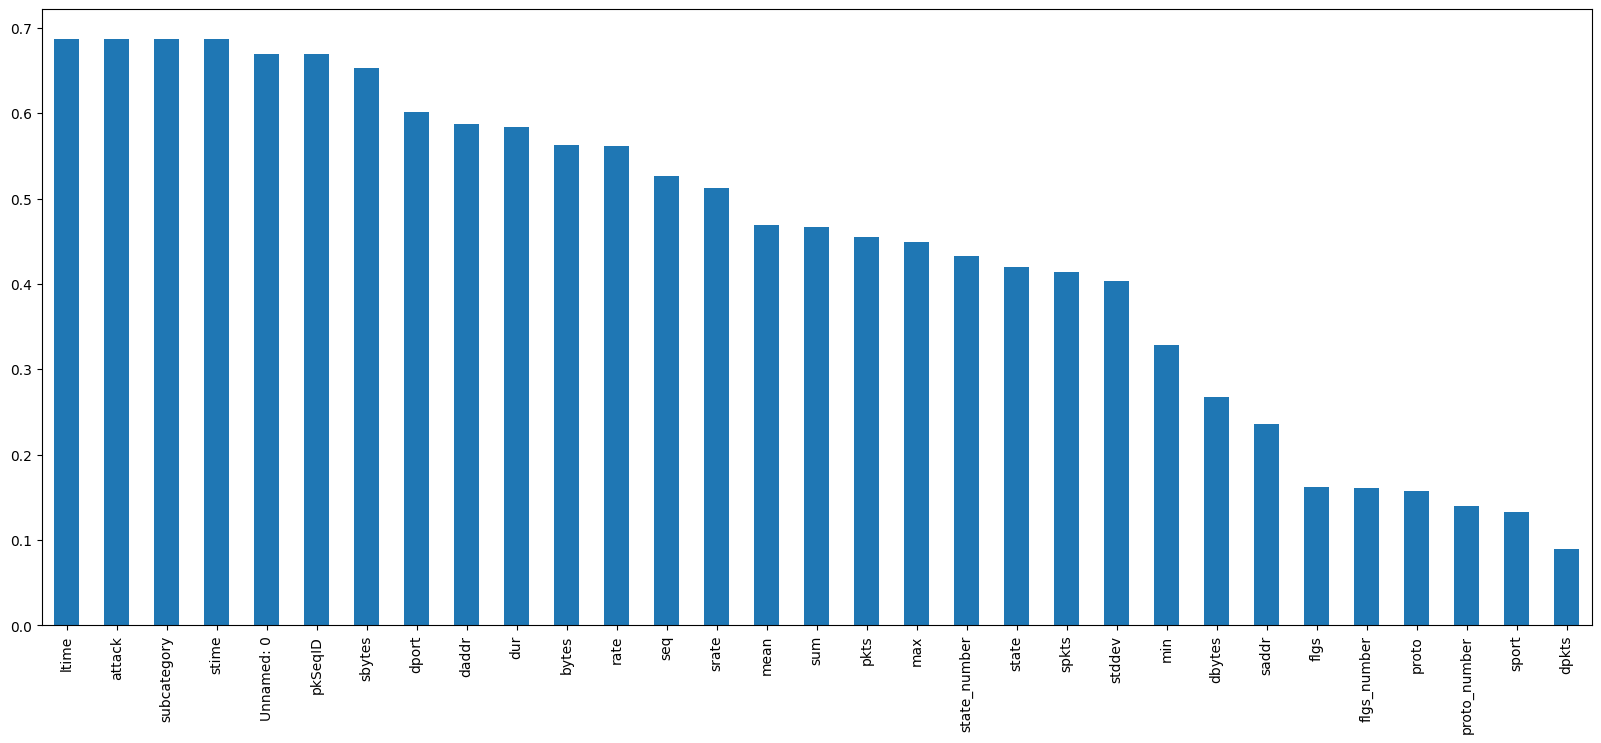

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

# **RF**

importing necessary packages

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

knowing the shape of the data

In [ ]:
fd.shape

(1077, 32)

In [ ]:
fd

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,attack,category,subcategory
1926624,3576887,3576885,1.526344e+09,0,1,0,2,0,-1,16,...,0.000007,2,2,120,120,0.002508,0.000836,0,1,0
1926625,3576888,3576886,1.526344e+09,0,1,2,1,12,139,17,...,0.000042,5,5,350,330,0.006190,0.002751,0,1,0
1926626,3576889,3576887,1.526344e+09,0,1,3,3,3,51838,71,...,0.048565,1,1,90,90,20.590960,0.000000,0,1,0
1926627,3576890,3576888,1.526344e+09,0,1,0,2,7,-1,20,...,0.000261,5,5,210,300,0.006189,0.002751,0,1,0
1926628,3576891,3576889,1.526344e+09,0,1,3,3,5,58999,9,...,0.178655,2,2,174,456,0.005264,0.001755,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267329,1917590,1917590,1.528096e+09,4,2,2,1,3,34003,16,...,4.199140,7,2,890,120,0.493603,0.370202,1,0,1
1756804,3407067,3407065,1.528099e+09,0,1,3,3,3,27282,16,...,4.163939,7,0,420,0,0.484556,0.484556,1,0,2
44615,1694876,1694876,1.528096e+09,4,2,2,1,1,20146,16,...,0.000000,2,0,308,0,0.103651,0.103651,1,0,1
1763396,3413659,3413657,1.528099e+09,0,1,3,3,4,36432,16,...,4.090592,7,0,420,0,0.490321,0.490321,1,0,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(independent_variable,dependent_variable,test_size=0.2, random_state=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

accuracy

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[ 0 68 52  1  0]
 [ 0 93  0  0  2]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


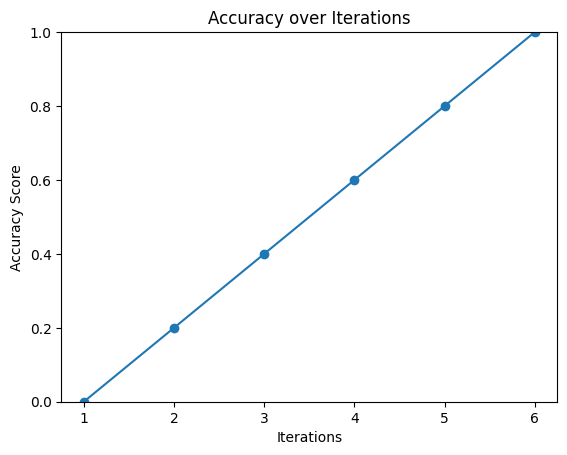

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have already predicted the labels 'y_pred' and have the true labels 'y_test'

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Assuming you have a list of accuracy scores over multiple iterations
accuracy_scores = [0.0,0.2,0.4,0.6,0.8,1.0]  # Replace with your actual accuracy scores

# Plotting the line graph for accuracy scores
iterations = range(1, len(accuracy_scores) + 1)

plt.plot(iterations, accuracy_scores, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Accuracy Score')
plt.title('Accuracy over Iterations')
plt.xticks(iterations)
plt.ylim(0, 1)  # Adjust the y-axis limits if necessary
plt.show()


# **OTHER ONE**

we will have to scale the data before training, to do this we divide the data into x&y

In [ ]:
x=fd.iloc[:,0:4].values
y=fd.iloc[:, 4].values

we divide the data into train & test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
classifier.score(x_test,y_test)

1.0

The confusion matrix is a N x N matrix, where N is the number of classes or outputs. For 2 classes, we get a 2 x 2 confusion matrix. For 3 classes, we get a 3 X 3 confusion matrix.the correct classification of the values will be on the diagonal running from top-left to bottom-right and all the other values are misclassified

# **SVM**

**divide the data as train/test dataset**

train(80) test(20 rows)
train(x,y)(x itself is 2D array & y itself is 1D array)
test(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(independent_variable,dependent_variable,test_size=0.2, random_state=4)
x_train.shape


(861, 31)

In [ ]:
y_train.shape


(861,)

In [ ]:
X_test.shape


(216, 31)

In [ ]:
y_test.shape

(216,)

MODELING(SVM)<br>
Support Vector Classifier(svc): refers those data points whose distance from the hyper plane we calculate individually and then sum that data if that sum is max that compare to other plane such called svc<br>
kernel:it's a function which helps to see data in d/f perspective, wehave 4 types of kernel "linear","polynomial","RBF","sigmoid" the default is RBF &kernel co-efficient is gamma & it is calculated auto.<br>


In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto')
classifier.fit(x_train,y_train)
y_predict = classifier.predict(X_test)


Evaluation

the correct classification of the values will be on the diagonal running from top-left to bottom-right and all the other values are misclassified

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_pred))

[[ 0 68 52  1  0]
 [ 0 93  0  0  2]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        95

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

0.4305555555555556


Pression : true prediction